In [123]:
import pandas as pd
import numpy as np
import sklearn as skl
import matplotlib.pyplot as plt
import seaborn as sns

# import preproccesing libraries
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# import  ML models
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

# import visualization's libraries
import graphviz
import pydot
from sklearn.tree import plot_tree

In [124]:
# Carga del dataset
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [125]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Carga del dataset


---


In [126]:
ruta = "/content/drive/MyDrive/ISTEA/Segundo_año/Aprendizaje Automático/Tabla_GDP_1parcial.xlsx"
df = pd.read_excel(ruta)


In [127]:
df

,province,gdp,illiteracy,poverty,deficient_infra,school_dropout,no_healthcare,birth_mortal,pop,movie_theatres_per_cap,doctors_per_cap
0,Buenos Aires,2.926899e+08,1.383240,8.167798,5.511856,0.766168,48.7947,4.4,15625084,0.000006,0.004836
1,Catamarca,6.150949e+06,2.344140,9.234095,10.464484,0.951963,45.0456,1.5,367828,0.000005,0.004502
2,Córdoba,6.936374e+07,2.714140,5.382380,10.436086,1.035056,45.7640,4.8,3308876,0.000011,0.010175
3,Corrientes,7.968013e+06,NaN,12.747191,17.438858,3.864265,62.1103,5.9,992595,0.000004,0.004495
4,Chaco,9.832643e+06,7.517580,15.862619,31.479527,2.577462,65.5104,7.5,1055259,0.000003,0.003605
5,Chubut,1.774785e+07,1.548060,8.051752,8.044618,0.586309,39.5473,3.0,509108,0.000016,0.004498
6,Entre Ríos,2.074341e+07,3.185580,7.288751,18.794568,NaN,NaN,3.1,1235994,0.000006,0.004679
7,Formosa,3.807057e+06,4.610640,17.035583,28.004985,2.268974,65.8126,16.2,530162,0.000004,0.003440
8,Jujuy,NaN,2.151390,13.367965,12.483179,0.721295,54.1615,3.7,673307,0.000003,0.003958
9,La Pampa,6.990262e+06,1.539300,3.398774,16.505714,0.204093,45.4764,7.2,318951,0.000019,0.005415


### Cantidad de valores nulos


---


In [128]:
print("Valores nulos en el conjunto de datos:")
df.isnull().sum()

Valores nulos en el conjunto de datos:


province                  0
gdp                       2
illiteracy                2
poverty                   0
deficient_infra           0
school_dropout            2
no_healthcare             2
birth_mortal              0
pop                       0
movie_theatres_per_cap    0
doctors_per_cap           0
dtype: int64

### Identificando si hay valores duplicados


---

In [129]:
hay_duplicados = df.duplicated().any()

if hay_duplicados:
    print("Hay registros duplicados en el DataFrame.")
else:
    print("No hay registros duplicados en el DataFrame.")

No hay registros duplicados en el DataFrame.


### Estadísticas descriptivas del conjunto de datos


---


In [130]:
print("Estadísticas descriptivas del conjunto de datos:")
df.describe()

Estadísticas descriptivas del conjunto de datos:


,gdp,illiteracy,poverty,deficient_infra,school_dropout,no_healthcare,birth_mortal,pop,movie_theatres_per_cap,doctors_per_cap
count,2.000000e+01,20.000000,22.000000,22.000000,20.000000,20.000000,22.000000,2.200000e+01,22.000000,22.000000
mean,3.277525e+07,3.166403,9.925625,12.677304,1.749807,50.391715,4.986364,1.686352e+06,0.000007,0.004894
std,6.456121e+07,1.847379,3.779530,7.216860,1.201194,9.374135,3.498339,3.219828e+06,0.000004,0.001522
min,3.807057e+06,0.791485,3.398774,3.839852,0.204093,29.232100,0.800000,2.739640e+05,0.000002,0.002821
25%,8.188735e+06,1.967893,7.472754,7.569677,0.754950,45.368700,3.025000,5.143715e+05,0.000004,0.004061
50%,1.172229e+07,2.743675,9.142440,10.865881,1.437767,49.370500,4.000000,7.775305e+05,0.000006,0.004757
75%,2.119858e+07,3.517830,12.500143,16.100647,2.651142,55.079600,5.875000,1.230606e+06,0.000009,0.005334
max,2.926899e+08,7.517580,17.035583,31.479527,3.864265,65.812600,16.200000,1.562508e+07,0.000019,0.010175


### Realizamos una copia del conjunto de datos original


---


In [131]:
# Copia del df
df_copia = df[['province', 'illiteracy', 'school_dropout', 'birth_mortal']].copy()
df_copia

,province,illiteracy,school_dropout,birth_mortal
0,Buenos Aires,1.383240,0.766168,4.4
1,Catamarca,2.344140,0.951963,1.5
2,Córdoba,2.714140,1.035056,4.8
3,Corrientes,NaN,3.864265,5.9
4,Chaco,7.517580,2.577462,7.5
5,Chubut,1.548060,0.586309,3.0
6,Entre Ríos,3.185580,NaN,3.1
7,Formosa,4.610640,2.268974,16.2
8,Jujuy,2.151390,0.721295,3.7
9,La Pampa,1.539300,0.204093,7.2


### Remplazamos los valores nulos por la media de la columna respectiva


---

In [132]:
# Remplazamos los valores nulos por la media de la columna respectiva
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
df_copia[['illiteracy','school_dropout']]=imp.fit_transform(df_copia[['illiteracy','school_dropout']])
df_copia

,province,illiteracy,school_dropout,birth_mortal
0,Buenos Aires,1.383240,0.766168,4.4
1,Catamarca,2.344140,0.951963,1.5
2,Córdoba,2.714140,1.035056,4.8
3,Corrientes,3.166403,3.864265,5.9
4,Chaco,7.517580,2.577462,7.5
5,Chubut,1.548060,0.586309,3.0
6,Entre Ríos,3.185580,1.749807,3.1
7,Formosa,4.610640,2.268974,16.2
8,Jujuy,2.151390,0.721295,3.7
9,La Pampa,1.539300,0.204093,7.2


### Estandarización del dataset


---

In [133]:
# Estandarización
scaler=StandardScaler()
df_copia[['illiteracy','school_dropout','birth_mortal']]=scaler.fit_transform(df_copia[['illiteracy','school_dropout','birth_mortal']])
df_copia

,province,illiteracy,school_dropout,birth_mortal
0,Buenos Aires,-1.038651,-0.881165,-0.171556
1,Catamarca,-0.478949,-0.714726,-1.020029
2,Córdoba,-0.263433,-0.640290,-0.054526
3,Corrientes,0.000000,1.894176,0.267309
4,Chaco,2.534459,0.741431,0.735432
5,Chubut,-0.942647,-1.042286,-0.581164
6,Entre Ríos,0.011170,0.000000,-0.551906
7,Formosa,0.841234,0.465081,3.280849
8,Jujuy,-0.591222,-0.921364,-0.376360
9,La Pampa,-0.947750,-1.384683,0.647658


### Calculamos primer, segundo y tercer cuartil de la columna illiteracy


---

In [134]:
# Se calcula primer, segundo y tercer cuartil de la columna illiteracy
q1 = np.quantile(df_copia['illiteracy'],0.25)
q2 = np.quantile(df_copia['illiteracy'],0.50)
q3 = np.quantile(df_copia['illiteracy'],0.75)

print(q1)
print(q2)
print(q3)

-0.6678682022230867
-0.17367605340176506
0.14291458602813512


### Creamos una nueva columna y categorizamos la variable analfabetismo


---

In [135]:
# Creamos columna nueva
df_copia['illiteracy_index']=''

# Categorizamos la variable analfabetismo
df_copia.loc[df_copia['illiteracy']<q1,'illiteracy_index'] ='Low'
df_copia.loc[(df_copia['illiteracy']>=q1)&(df_copia['illiteracy']<q2),'illiteracy_index'] ='Middle'
df_copia.loc[df_copia['illiteracy']>=q2,'illiteracy_index'] ='High'
df_copia

,province,illiteracy,school_dropout,birth_mortal,illiteracy_index
0,Buenos Aires,-1.038651,-0.881165,-0.171556,Low
1,Catamarca,-0.478949,-0.714726,-1.020029,Middle
2,Córdoba,-0.263433,-0.640290,-0.054526,Middle
3,Corrientes,0.000000,1.894176,0.267309,High
4,Chaco,2.534459,0.741431,0.735432,High
5,Chubut,-0.942647,-1.042286,-0.581164,Low
6,Entre Ríos,0.011170,0.000000,-0.551906,High
7,Formosa,0.841234,0.465081,3.280849,High
8,Jujuy,-0.591222,-0.921364,-0.376360,Middle
9,La Pampa,-0.947750,-1.384683,0.647658,Low


### Splitting


---

In [136]:
# Particion del dataset con 30% datos para el conjunto de testing, 70% entrenamiento
x=pd.DataFrame(df_copia,columns=['illiteracy','school_dropout','birth_mortal'])
y=pd.DataFrame(df_copia,columns=['illiteracy_index'])


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=42)

In [137]:
print("x_train shape:",x_train.shape)
print("y_train shape:",y_train.shape)
print("x_test shape:",x_test.shape)
print("y_test shape:",y_test.shape)
y_train

x_train shape: (15, 3)
y_train shape: (15, 1)
x_test shape: (7, 3)
y_test shape: (7, 1)


,illiteracy_index
11,Middle
3,High
4,High
17,High
12,High
18,Low
16,High
2,Middle
9,Low
21,High


### Entrenamiento del dataset


---

In [138]:
# Entrenamiento del bosque aleatorio de clasificación
RFC=RandomForestClassifier(n_estimators=80, criterion='gini', max_depth=4,
                       min_samples_split=2, min_samples_leaf=1,
                       min_weight_fraction_leaf=0.0,
                       max_features='sqrt',
                       max_leaf_nodes=None,
                       min_impurity_decrease=0.0,
                       bootstrap=True)
RFC=RFC.fit(x_train,y_train)

<ipython-input-138-be47b0029d32>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFC=RFC.fit(x_train,y_train)


### Visualización


---



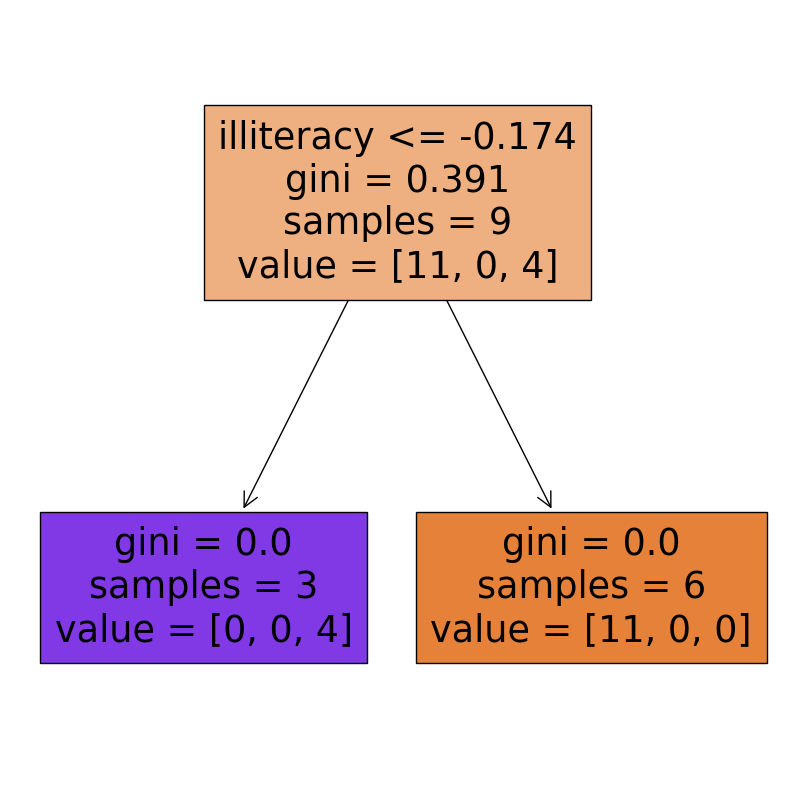

In [139]:
# Visualización del primer árbol
plt.figure(figsize=(10,10))
t=plot_tree(RFC.estimators_[0], feature_names=x_train.columns, filled=True)

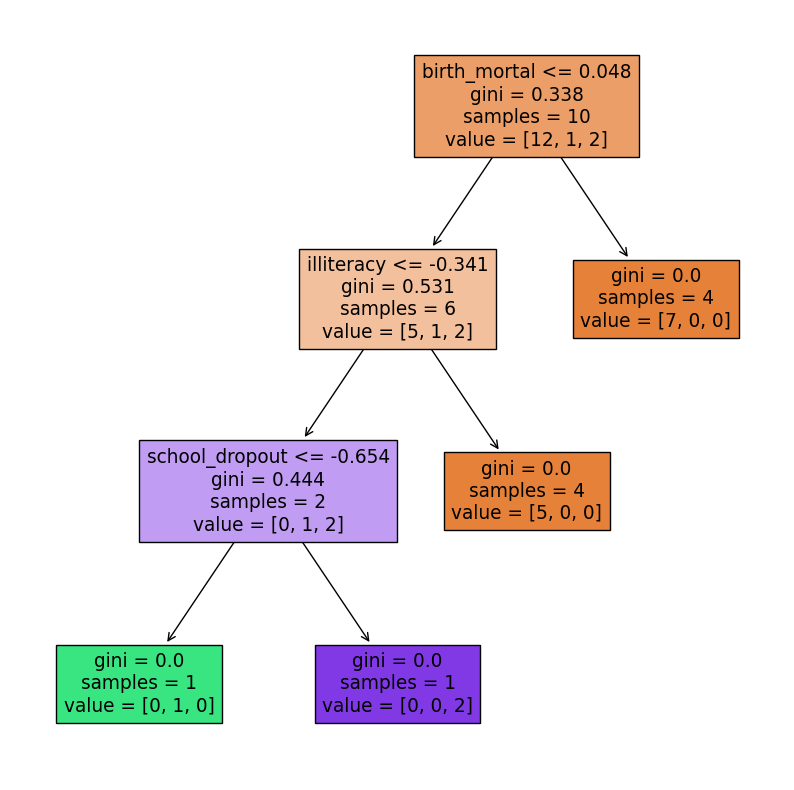

In [140]:
# Visualización del último árbol
plt.figure(figsize=(10,10))
t=plot_tree(RFC.estimators_[79], feature_names=x_train.columns, filled=True)

In [141]:
y_train.value_counts()

illiteracy_index
High                9
Low                 3
Middle              3
Name: count, dtype: int64

In [142]:
# Ejecución de predicciones en el modelo
y_pred_model=RFC.predict(x_test)
y_pred_model


array(['Middle', 'Low', 'Middle', 'Middle', 'High', 'Low', 'High'],
      dtype=object)

In [143]:
y_test.value_counts()

illiteracy_index
Low                 3
High                2
Middle              2
Name: count, dtype: int64

In [144]:
y_test=np.array(y_test,dtype='object')
y_test

array([['Low'],
       ['Low'],
       ['Middle'],
       ['Middle'],
       ['High'],
       ['Low'],
       ['High']], dtype=object)

In [145]:
# Comparación del conjunto de test y el conjunto de predicción
df_prediccion=pd.DataFrame(y_test,y_pred_model)
df_prediccion

,0
Middle,Low
Low,Low
Middle,Middle
Middle,Middle
High,High
Low,Low
High,High


### Validación


---

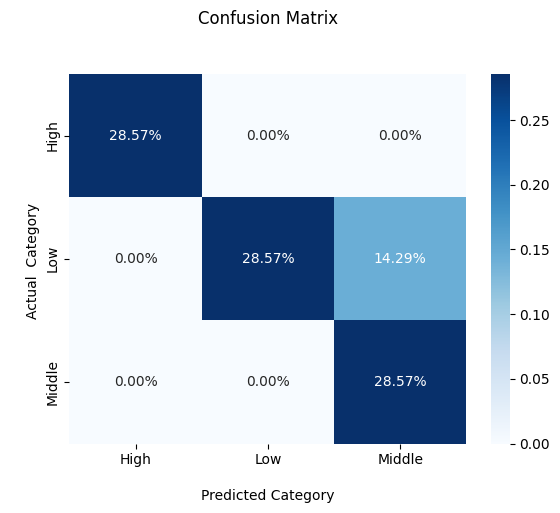

In [146]:
# Evaluando y visualizando la performance del modelo

# Matriz de confusión

cf_matrix=confusion_matrix(y_test,y_pred_model)
# print(cf_matrix)


ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
            fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Category');
ax.set_ylabel('\nActual  Category ');

# Lista en orden de la variable categórica alfabetización
ax.xaxis.set_ticklabels(['High','Low','Middle'])
ax.yaxis.set_ticklabels(['High','Low','Middle'])

# Visualización del la matriz de confusión
plt.show()

In [147]:
RFC.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 80,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [148]:
# Métrica 1: precision score
ps=precision_score(y_test,y_pred_model,average='macro')
round(ps*100,2)

88.89

In [149]:
# Métrica 2: recall score
rs=recall_score(y_test,y_pred_model,average='macro')
round(rs*100,2)

88.89

In [150]:
# Métrica 3: accuracy
accs=accuracy_score(y_test,y_pred_model)
round(accs*100,2)

85.71

In [151]:
# Resultados de las métricas
print("metric_1 (Precission_Score) :",round(ps*100,2))
print("metric_2 (Recall Score):",round(rs*100,2))
print("metric_3 (Accuracy):",round(accs*100,2))

metric_1 (Precission_Score) : 88.89
metric_2 (Recall Score): 88.89
metric_3 (Accuracy): 85.71
